In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller




In [93]:
df = pd.read_excel('AirQualityUCI.xlsx')


In [94]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [95]:
df.replace(to_replace=-200, value=np.nan, inplace=True)
df.fillna(method='ffill', inplace=True)

In [96]:
ts = pd.Series(df['CO(GT)'])

result = adfuller(ts)


In [97]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.423843
p-value: 0.000000


In [98]:

train = ts[:7000]
test = ts[7000:]


In [99]:

model = ARIMA(train, order=(1, 1, 1))
results = model.fit()



In [100]:
forecast = results.forecast(steps=len(test))
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)



In [101]:
print('Mean Squared Error: {}'.format(mse))
print('Root Mean Squared Error: {}'.format(rmse))
print('Mean Absolute Error: {}'.format(mae))

Mean Squared Error: 1.9268478398631865
Root Mean Squared Error: 1.3881094480851237
Mean Absolute Error: 1.1472662585793794


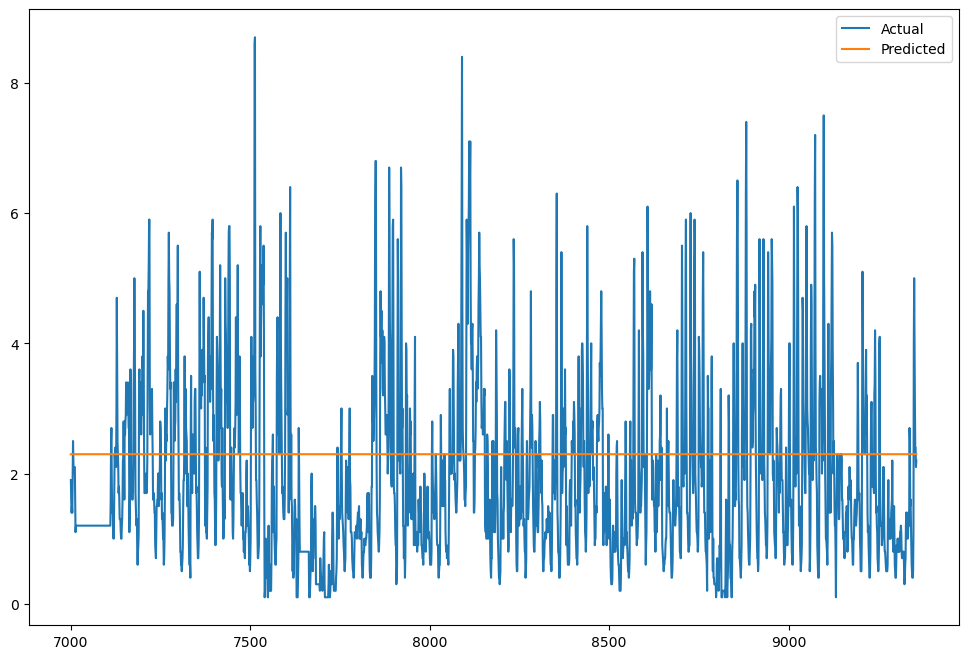

In [102]:

plt.figure(figsize=(12,8))
plt.plot(test, label='Actual')
plt.plot(forecast, label='Predicted')
plt.legend(loc='best')
plt.show()
